<a href="https://colab.research.google.com/github/Emma-Ok/Phishing-Detection-ML/blob/main/Exploring_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pishing For Machine Learning.

*Proyecto para la asignatura Modelos y Simulación 2.*
<br>

*Universidad de Antioquia*

In [6]:
# 1.1 Imports básicos
import pandas as pd
from pandas.api import types as ptypes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Para garantizar que las gráficas se muestren en Colab
%matplotlib inline

# 1.2 Carga de datos desde GitHub
url = "https://raw.githubusercontent.com/Emma-Ok/Phishing-Detection-ML/main/Phishing_Legitimate_full.csv"
df = pd.read_csv(url)
df = df.drop(columns=['id'])

target = 'CLASS_LABEL'

# 1.3 Primer vistazo
print("Shape del dataset:", df.shape)




Shape del dataset: (10000, 49)


In [7]:

df = df.apply(
    lambda col: col.astype('float32')
    if col.dtype == 'float64'
    else (col.astype('int32') if col.dtype == 'int64' else col)
)
# 2.1 Tipos de cada columna
print(df.dtypes)

# 2.2 Estadísticas descriptivas generales
display(df.describe().T)


# 2.3 Verificar valores faltantes
missing = df.isnull().sum()
print("Variables con valores faltantes:\n", missing[missing > 0])


NumDots                                 int32
SubdomainLevel                          int32
PathLevel                               int32
UrlLength                               int32
NumDash                                 int32
NumDashInHostname                       int32
AtSymbol                                int32
TildeSymbol                             int32
NumUnderscore                           int32
NumPercent                              int32
NumQueryComponents                      int32
NumAmpersand                            int32
NumHash                                 int32
NumNumericChars                         int32
NoHttps                                 int32
RandomString                            int32
IpAddress                               int32
DomainInSubdomains                      int32
DomainInPaths                           int32
HttpsInHostname                         int32
HostnameLength                          int32
PathLength                        

,count,mean,std,min,25%,50%,75%,max
NumDots,10000.0,2.445100,1.346836,1.0,2.000000,2.000000,3.000000,21.0
SubdomainLevel,10000.0,0.586800,0.751214,0.0,0.000000,1.000000,1.000000,14.0
PathLevel,10000.0,3.300300,1.863241,0.0,2.000000,3.000000,4.000000,18.0
UrlLength,10000.0,70.264100,33.369877,12.0,48.000000,62.000000,84.000000,253.0
NumDash,10000.0,1.818000,3.106258,0.0,0.000000,0.000000,2.000000,55.0
NumDashInHostname,10000.0,0.138900,0.545744,0.0,0.000000,0.000000,0.000000,9.0
AtSymbol,10000.0,0.000300,0.017319,0.0,0.000000,0.000000,0.000000,1.0
TildeSymbol,10000.0,0.013100,0.113709,0.0,0.000000,0.000000,0.000000,1.0
NumUnderscore,10000.0,0.323200,1.114660,0.0,0.000000,0.000000,0.000000,18.0
NumPercent,10000.0,0.073800,0.622248,0.0,0.000000,0.000000,0.000000,19.0


Variables con valores faltantes:
 Series([], dtype: int64)


In [8]:
def inspect_and_convert_float_columns(df: pd.DataFrame):
    """
    1. Lista las columnas float del DataFrame.
    2. Muestra sus estadísticas descriptivas.
    3. Verifica qué porcentaje de valores en cada columna son enteros exactos.

    Parámetros
    ----------
    df : pd.DataFrame
        Tu DataFrame original.
    Retorna
    -------
    result : dict
        {
          'float_cols': List[str],
          'stats': pd.DataFrame,
          'integerity': Dict[col, pct_enteros],
        }
    """
    # 1. Identificar float columns
    float_cols = df.select_dtypes(include='float').columns.tolist()
    print(f"✎ Columnas float identificadas: {float_cols}\n")

    # 2. Estadísticas descriptivas
    stats = df[float_cols].describe().T
    display(stats)

    # 3. Chequear enteridad
    integerity = {}
    for col in float_cols:
        # fracciones iguales a cero
        pct_int = (df[col] % 1 == 0).mean() * 100
        integerity[col] = pct_int
        print(f"• {col}: {pct_int:.1f}% de valores son enteros exactos")
    print()
    return {
        'float_cols': float_cols,
        'stats': stats,
        'integerity': integerity,
    }

res = inspect_and_convert_float_columns(df)

✎ Columnas float identificadas: ['PctExtHyperlinks', 'PctExtResourceUrls', 'PctNullSelfRedirectHyperlinks']



,count,mean,std,min,25%,50%,75%,max
PctExtHyperlinks,10000.0,0.241334,0.342363,0.0,0.000000,0.071429,0.315874,1.0
PctExtResourceUrls,10000.0,0.392932,0.387295,0.0,0.030303,0.247511,0.785714,1.0
PctNullSelfRedirectHyperlinks,10000.0,0.136136,0.312426,0.0,0.000000,0.000000,0.047619,1.0


• PctExtHyperlinks: 41.7% de valores son enteros exactos
• PctExtResourceUrls: 39.5% de valores son enteros exactos
• PctNullSelfRedirectHyperlinks: 66.6% de valores son enteros exactos



*PctExtHyperlink* --> Counts the percentage of external hyperlinks in the source code HTML

<br/>

*PctExtResourceUrls* --> Counts the percentage of external resource URLs in the
HTML source code.

<br/>

*PctNullSelfRedirectHyperlinks*: Count the percentage of hyperlink fields that contain empty value or an autoredirect value or an abnormal value.

Observamos que no hay datos faltantes.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api import types as ptypes

def inspect_column_types(df: pd.DataFrame, max_unique_values: int = 10, show_values: bool = True):
    """
    Inspecciona cada columna de df y devuelve un resumen con:
      - dtype
      - n.º de valores únicos
      - lista de valores únicos (hasta max_unique_values)
      - recommended_type: 'binaria', 'categórica' o 'continua'
    """
    rows = []
    for col in df.columns:
        dtype = df[col].dtype
        uniques = pd.Series(df[col].dropna().unique())
        n_uniques = uniques.size

        # Determina tipo
        if ptypes.is_numeric_dtype(dtype) and set(uniques.tolist()) <= {0,1}:
            rec_type = 'binaria'
        elif ptypes.is_numeric_dtype(dtype) and n_uniques <= max_unique_values:
            rec_type = 'categórica'
        elif ptypes.is_numeric_dtype(dtype):
            rec_type = 'continua'
        else:
            rec_type = 'categórica'

        sample = list(uniques[:max_unique_values]) if show_values else None
        if show_values and n_uniques > max_unique_values:
            sample.append('…')

        rows.append({
            'column': col,
            'dtype': str(dtype),
            'unique_count': n_uniques,
            'sample_values': sample,
            'recommended_type': rec_type
        })

    return pd.DataFrame(rows)

,column,dtype,unique_count,sample_values,recommended_type
0,NumDots,int32,17,"[3, 2, 1, 8, 5, 4, 6, 12, 7, 14, …]",continua
1,SubdomainLevel,int32,13,"[1, 0, 7, 4, 2, 11, 3, 8, 6, 5, …]",continua
2,PathLevel,int32,18,"[5, 3, 2, 6, 4, 1, 10, 7, 9, 8, …]",continua
3,UrlLength,int32,226,"[72, 144, 58, 79, 46, 42, 60, 30, 76, 64, …]",continua
4,NumDash,int32,25,"[0, 1, 2, 3, 11, 4, 5, 7, 6, 13, …]",continua
5,NumDashInHostname,int32,10,"[0, 1, 2, 4, 3, 5, 7, 6, 9, 8]",categórica
6,AtSymbol,int32,2,"[0, 1]",binaria
7,TildeSymbol,int32,2,"[0, 1]",binaria
8,NumUnderscore,int32,16,"[0, 2, 7, 3, 1, 8, 5, 4, 6, 12, …]",continua
9,NumPercent,int32,14,"[0, 4, 1, 2, 3, 5, 6, 8, 15, 7, …]",continua


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_binary_columns(df, cols, n_cols=3, palette='pastel', title='Variables Binarias'):
    n = len(cols)
    if n == 0:
        print("No hay variables binarias para graficar.")
        return
    n_rows = (n + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3*n_rows))
    axes = axes.flatten()

    for ax, col in zip(axes, cols):
        sns.countplot(x=df[col], ax=ax, palette=palette)
        ax.set_title(col)
        ax.set_xlabel("")
        ax.set_ylabel("Count")

    for ax in axes[n:]:
        ax.set_visible(False)

    fig.suptitle(title, fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


def plot_categorical_columns(df, cols, n_cols=2, palette='Set2', title='Variables Categóricas'):
    n = len(cols)
    if n == 0:
        print("No hay variables categóricas para graficar.")
        return
    n_rows = (n + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 3*n_rows))
    axes = axes.flatten()

    for ax, col in zip(axes, cols):
        order = df[col].value_counts().index
        sns.countplot(y=df[col], order=order, ax=ax, palette=palette)
        ax.set_title(col)
        ax.set_xlabel("Count")
        ax.set_ylabel("")

    for ax in axes[n:]:
        ax.set_visible(False)

    fig.suptitle(title, fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


def plot_continuous_columns(df, cols, n_cols=2, palette=None, title='Variables Continuas'):
    n = len(cols)
    if n == 0:
        print("No hay variables continuas para graficar.")
        return
    n_rows = (n + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 3*n_rows))
    axes = axes.flatten()

    for ax, col in zip(axes, cols):
        sns.histplot(df[col], bins=30, kde=True, ax=ax, color=None)
        ax.set_title(col)
        ax.set_xlabel(col)
        ax.set_ylabel("Frequency")

    for ax in axes[n:]:
        ax.set_visible(False)

    fig.suptitle(title, fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


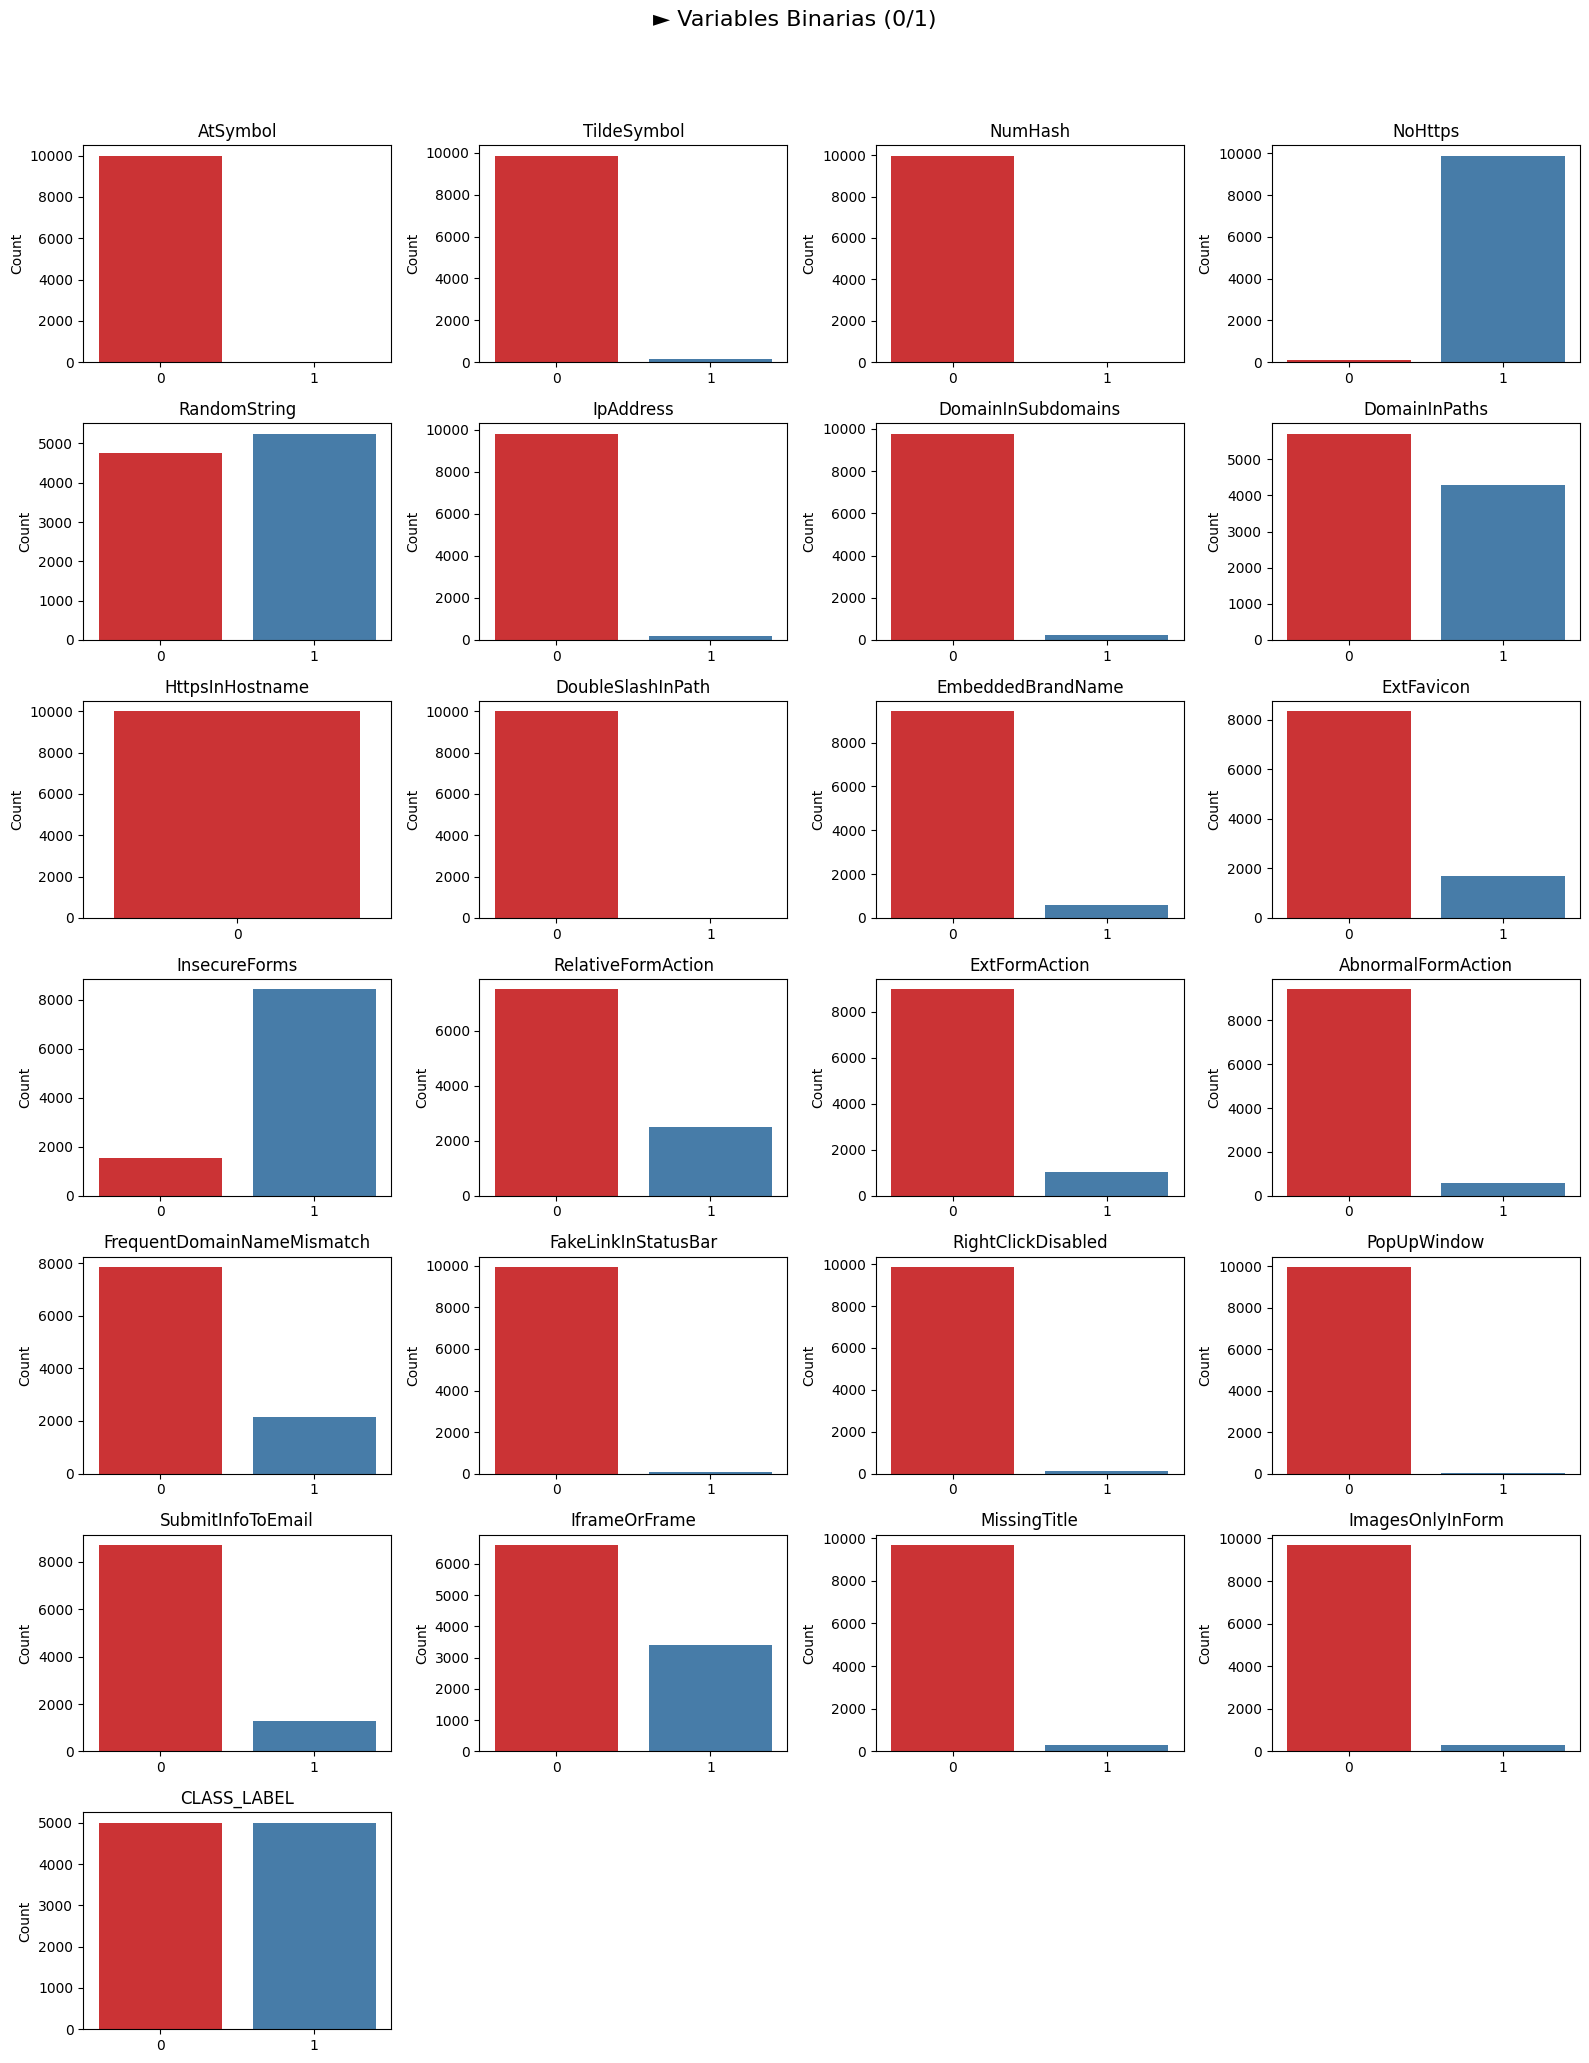

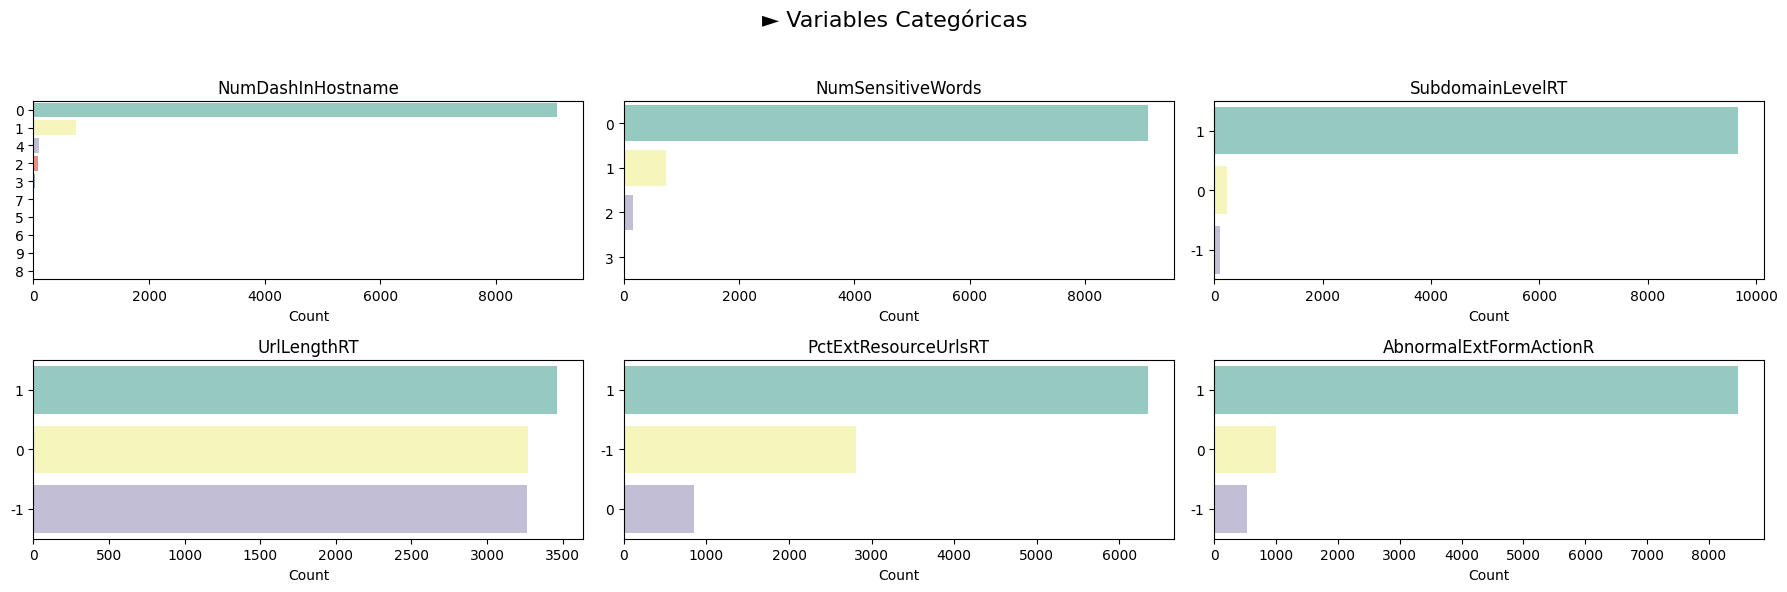

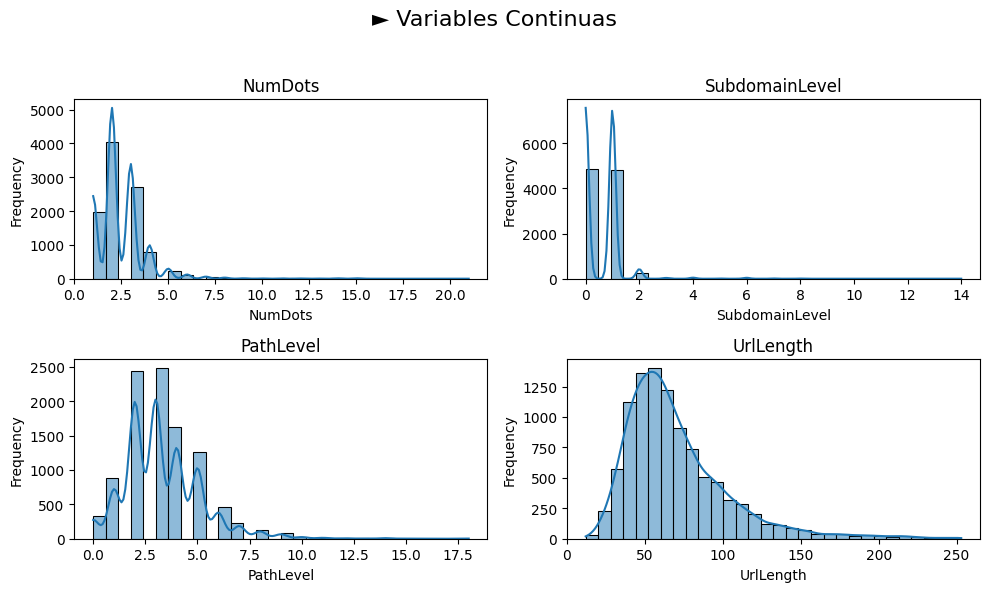

In [ ]:
# Genera el summary
summary = inspect_column_types(df, max_unique_values=10, show_values=False)

# Separa nombres por tipo
bin_cols  = summary.query("recommended_type=='binaria'")['column'].tolist()
cat_cols  = summary.query("recommended_type=='categórica'")['column'].tolist()
cont_cols = summary.query("recommended_type=='continua'")['column'].tolist()

# 3. Plotea cada grupo con su título
plot_binary_columns(df,   bin_cols,  n_cols=4, palette='Set1', title='► Variables Binarias (0/1)')
plot_categorical_columns(df, cat_cols[:6], n_cols=3, palette='Set3', title='► Variables Categóricas')
plot_continuous_columns(df,  cont_cols[:4], n_cols=2, title='► Variables Continuas')


In [ ]:
def remove_constant_zero_columns(df: pd.DataFrame, target: str = None, verbose: bool = True):
    """
    Identifica columnas cuya única señal es 0 (min == max == 0),
    muestra información básica y las elimina del DataFrame.

    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame original con todas las columnas numéricas (y la columna target opcional).
    target : str, opcional
        Nombre de la columna objetivo que NO debe considerarse para eliminación.
    verbose : bool, default True
        Si es True, imprime el análisis de cada columna constante.
    Retorna
    -------
    df_clean : pd.DataFrame
        DataFrame sin las columnas constantes en 0.
    dropped_cols : List[str]
        Lista de columnas que fueron eliminadas.
    """
    # 1. Determinar columnas a revisar
    cols = df.columns.drop(target) if target in df.columns else df.columns

    # 2. Filtrar columnas constantes en 0
    const_zero_cols = [col for col in cols if df[col].min() == 0 and df[col].max() == 0]

    # 3. Si verbose, mostrar análisis rápido
    if verbose and const_zero_cols:
        print(f"Columnas constantes en 0 ({len(const_zero_cols)}): {const_zero_cols}\n")
        for col in const_zero_cols:
            num_nulls = df[col].isnull().sum()
            pct_zeros = (df[col] == 0).mean() * 100
            print(f"- {col}: únicos = {df[col].unique()}, nulos = {num_nulls}, % ceros = {pct_zeros:.1f}%")
        print()
    elif verbose:
        print("No se encontraron columnas constantes en 0.")

    # 4. Eliminar esas columnas
    df_clean = df.drop(columns=const_zero_cols)

    return df_clean, const_zero_cols

# === Ejemplo de uso ===
# Supongamos que tu DataFrame se llama df y tu target 'Label'
df_limpio, columnas_eliminadas = remove_constant_zero_columns(df, target='Label')

print("Shape antes:", df.shape)
print("Shape después:", df_limpio.shape)


Columnas constantes en 0 (1): ['HttpsInHostname']

- HttpsInHostname: únicos = [0], nulos = 0, % ceros = 100.0%

Shape antes: (10000, 49)
Shape después: (10000, 48)


Observamos que no hay datos faltantes.

El dataset no está desbalanceado.

In [ ]:

X = df.drop(columns=['CLASS_LABEL'])

# 1. Creamos el selector con un umbral de varianza
threshold = 0.001
selector = VarianceThreshold(threshold=threshold)
selector.fit(X)

# 2. Columnas a conservar y a eliminar
keep_cols = X.columns[selector.get_support()]
drop_lowvar = [col for col in X.columns if col not in keep_cols]

print(f"Umbral de varianza: {threshold}")
print(f"Total de features: {X.shape[1]}")
print(f"Features con varianza < {threshold}: {len(drop_lowvar)}\n")
print("Lista de features de muy baja varianza:")
for col in drop_lowvar:
    var = X[col].var()
    print(f" • {col}: varianza = {var:.5f}")


Umbral de varianza: 0.001
Total de features: 48
Features con varianza < 0.001: 3

Lista de features de muy baja varianza:
 • AtSymbol: varianza = 0.00030
 • HttpsInHostname: varianza = 0.00000
 • DoubleSlashInPath: varianza = 0.00090


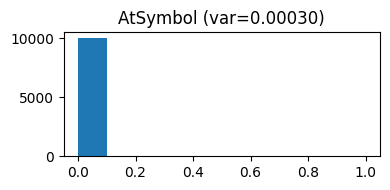

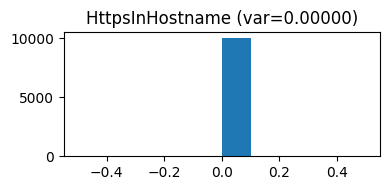

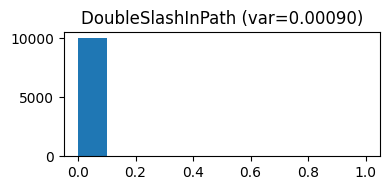

In [ ]:


# Selecciona hasta 4 features de baja varianza para graficar
to_plot = drop_lowvar[:4]

for col in to_plot:
    plt.figure(figsize=(4,2))
    plt.hist(X[col], bins=10)
    plt.title(f"{col} (var={X[col].var():.5f})")
    plt.tight_layout()
    plt.show()

Baja varianza → feature casi constante → poca o nula información para distinguir clases.

Recomendación → eliminar estas columnas antes de entrenar modelos (p. ej. con VarianceThreshold), y así mejorar eficiencia y reducir riesgo de sobreajuste.

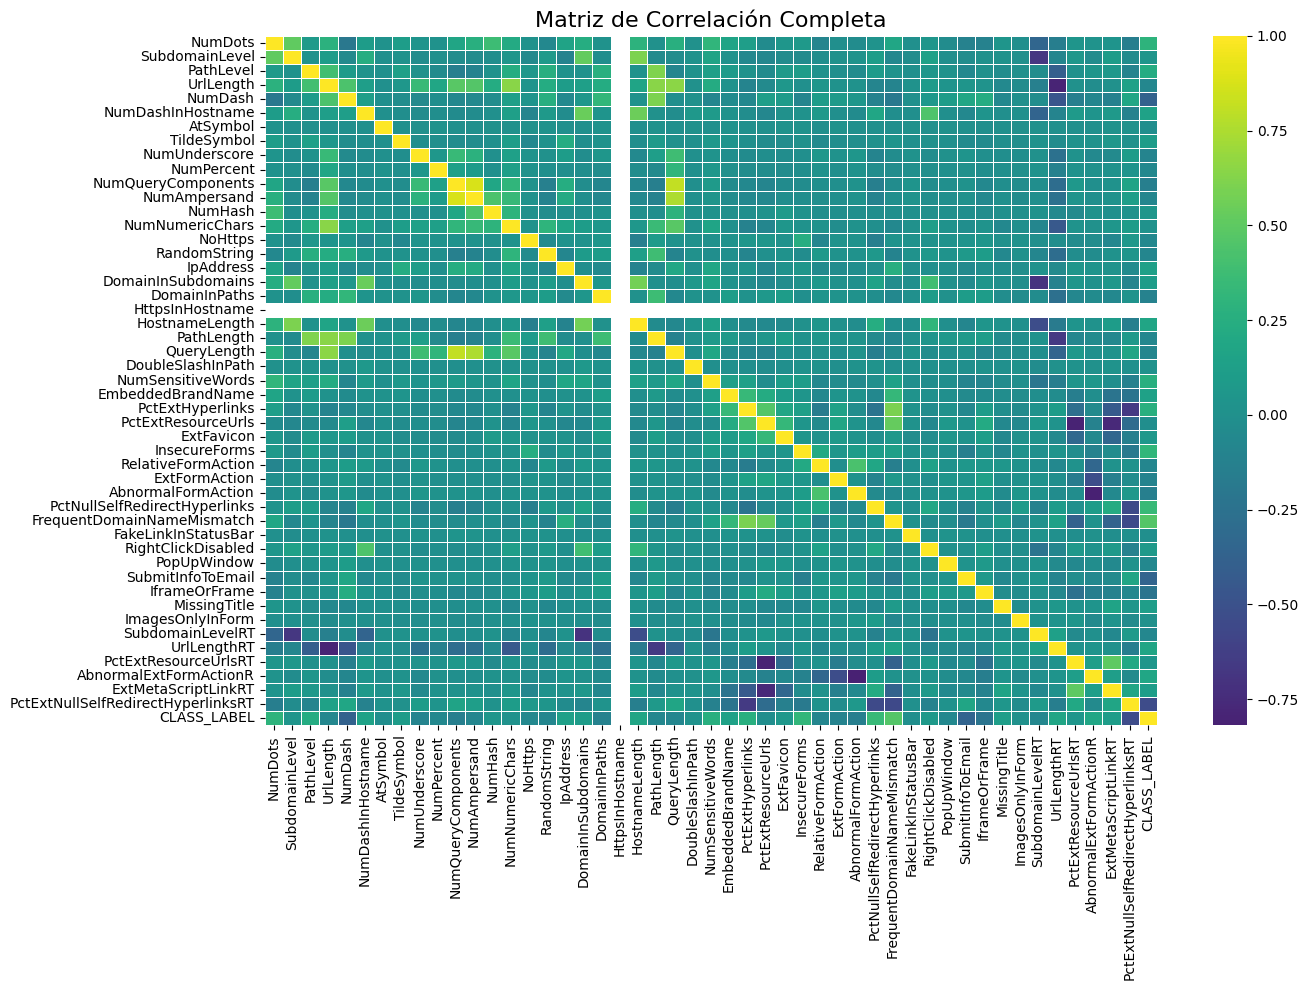

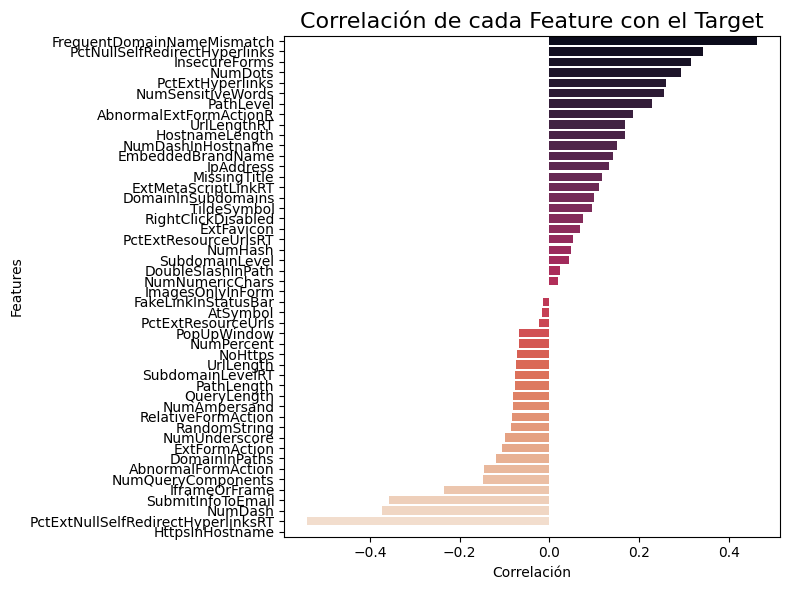

In [ ]:
corr = df.corr()

# 3. Heatmap de correlaciones
plt.figure(figsize=(14,10))
sns.heatmap(
    corr,
    cmap='viridis',       # paleta distinta: 'viridis', 'mako', 'rocket', etc.
    center=0,
    annot=False,          # True si quieres ver los valores
    linewidths=0.5
)
plt.title("Matriz de Correlación Completa", fontsize=16)
plt.tight_layout()
plt.show()

# Extrayendo y ordenando por valor absoluto
corr_target = corr[target].drop(target).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(
    x=corr_target.values,
    y=corr_target.index,
    palette='rocket'  # paleta distinta: 'rocket', 'mako', 'viridis', etc.
)
plt.title("Correlación de cada Feature con el Target", fontsize=16)
plt.xlabel("Correlación")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

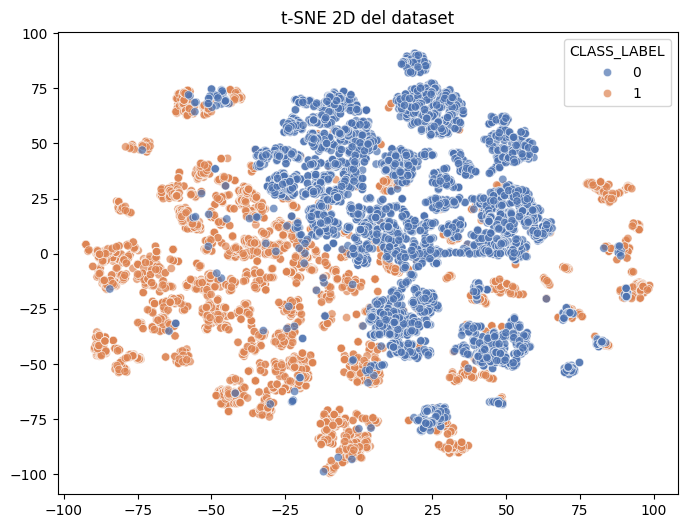

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X2d = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X2d[:,0], y=X2d[:,1], hue=df[target], palette="deep", alpha=0.7)
plt.title("t-SNE 2D del dataset")
plt.legend(title=target)
plt.show()
